In [1]:
from src.pre_procesamiento.transformar_datos_para_analisis_descriptivo import (
  VARS_NUMERICAS,
  VARS_CATEGORICAS,
  etiquetar_vacios_en_train_y_test
)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de entrenamiento y de test, donde los vacíos de las
# variables categóricas han sido reemplazados por '?'
datos_train, datos_test = etiquetar_vacios_en_train_y_test()

In [3]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  class           32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [4]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 32561 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  int64   
 1   workclass       16281 non-null  category
 2   fnlwgt          16281 non-null  int64   
 3   education       16281 non-null  category
 4   education-num   16281 non-null  int64   
 5   marital-status  16281 non-null  category
 6   occupation      16281 non-null  category
 7   relationship    16281 non-null  category
 8   race            16281 non-null  category
 9   sex             16281 non-null  category
 10  capital-gain    16281 non-null  int64   
 11  capital-loss    16281 non-null  int64   
 12  hours-per-week  16281 non-null  int64   
 13  native-country  16281 non-null  category
 14  class           16281 non-null  category
dtypes: category(9), int64(6)
memory usage: 910.5 KB


In [5]:
# Reconstruir el conjunto de datos
datos = pd.concat([datos_train, datos_test], ignore_index = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


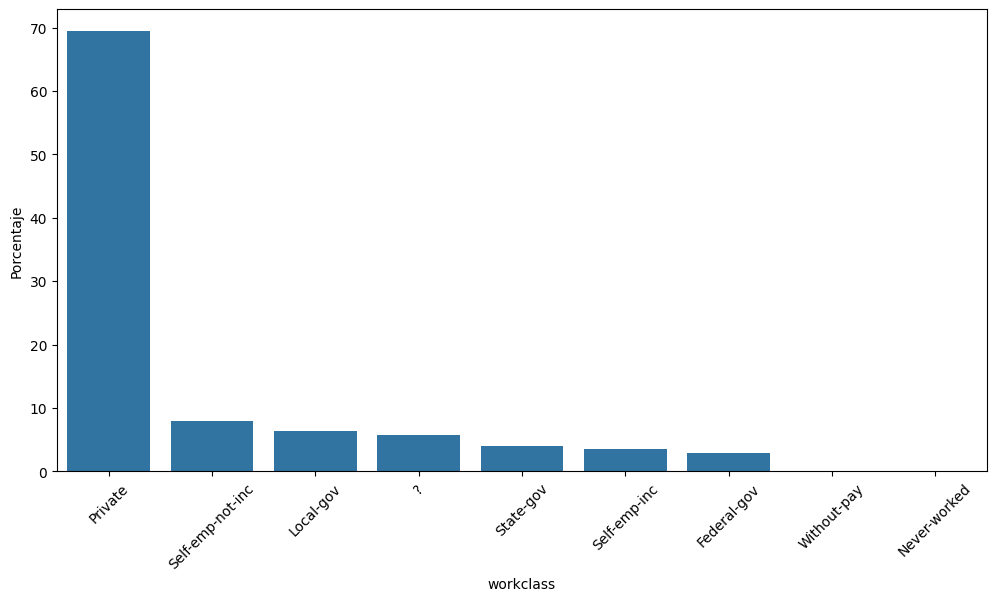

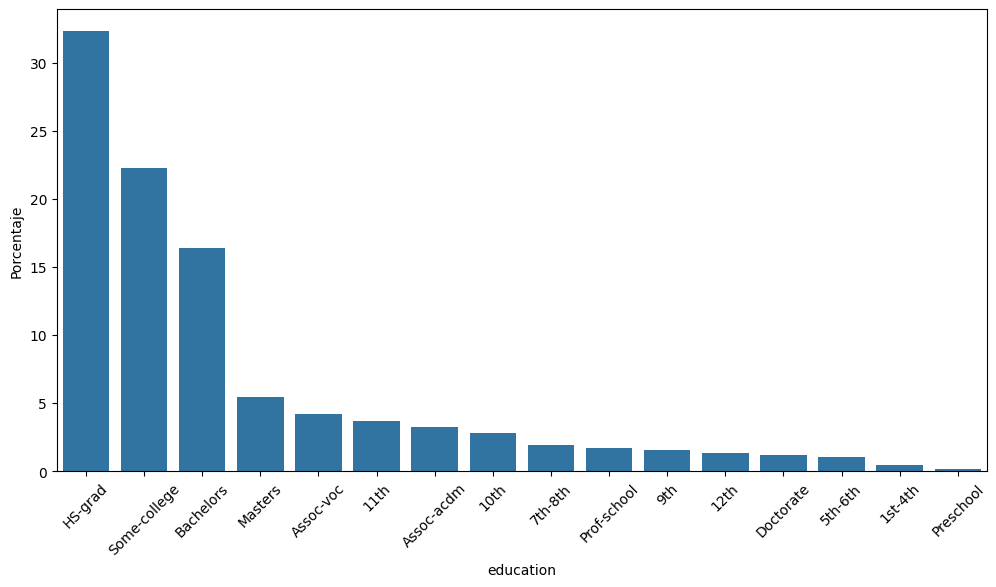

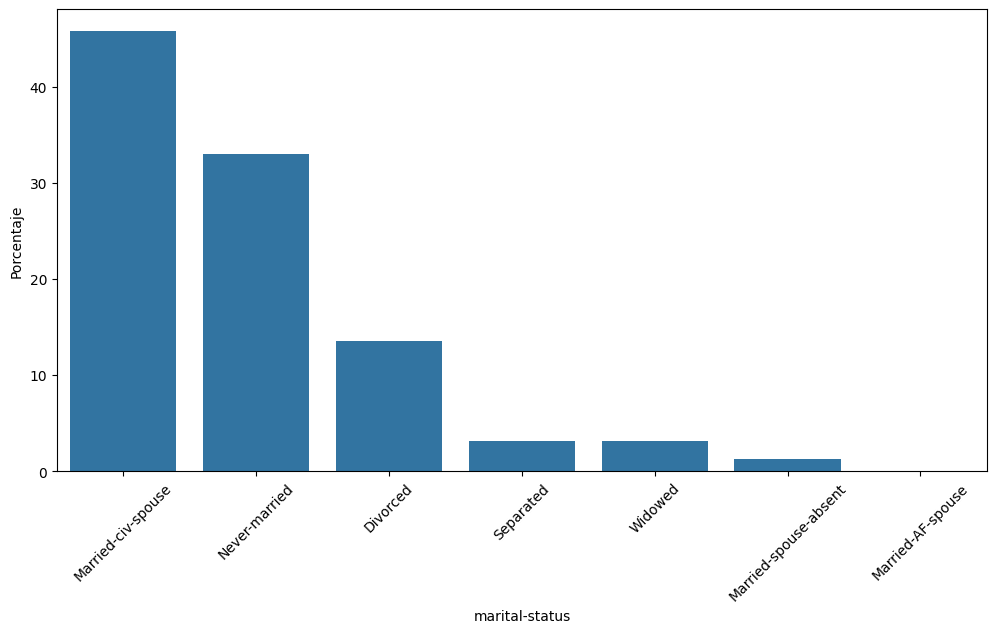

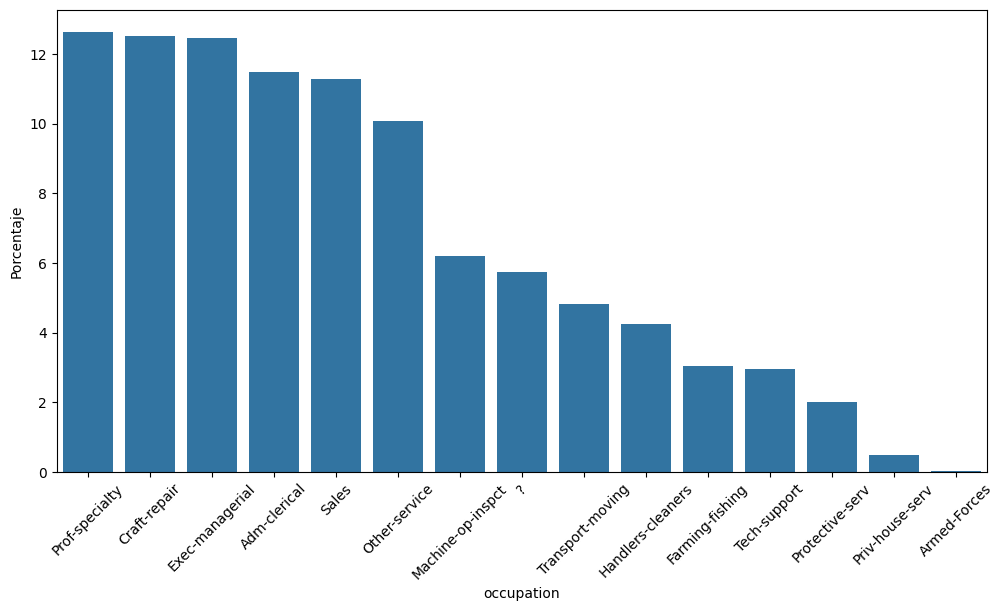

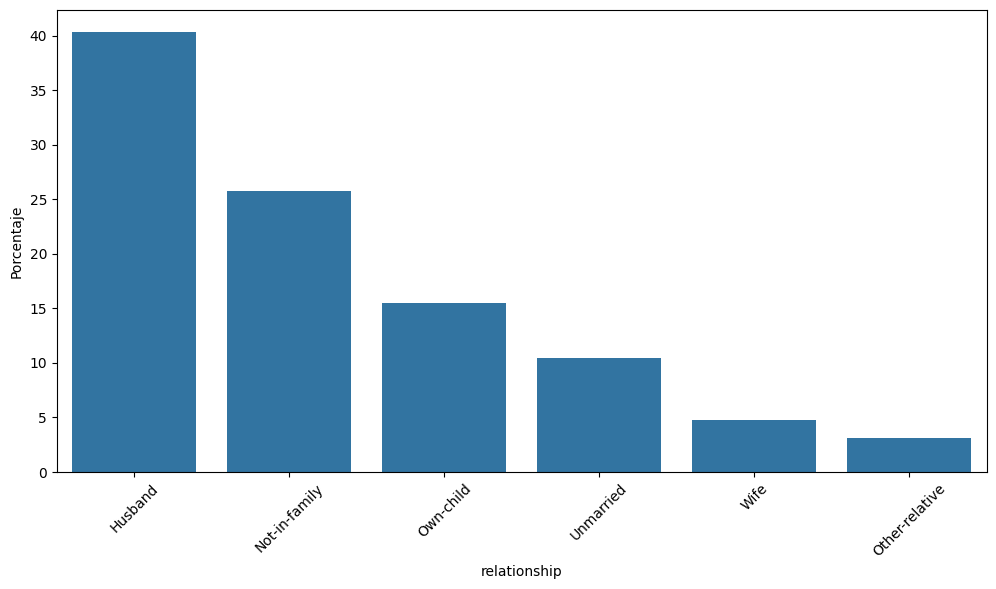

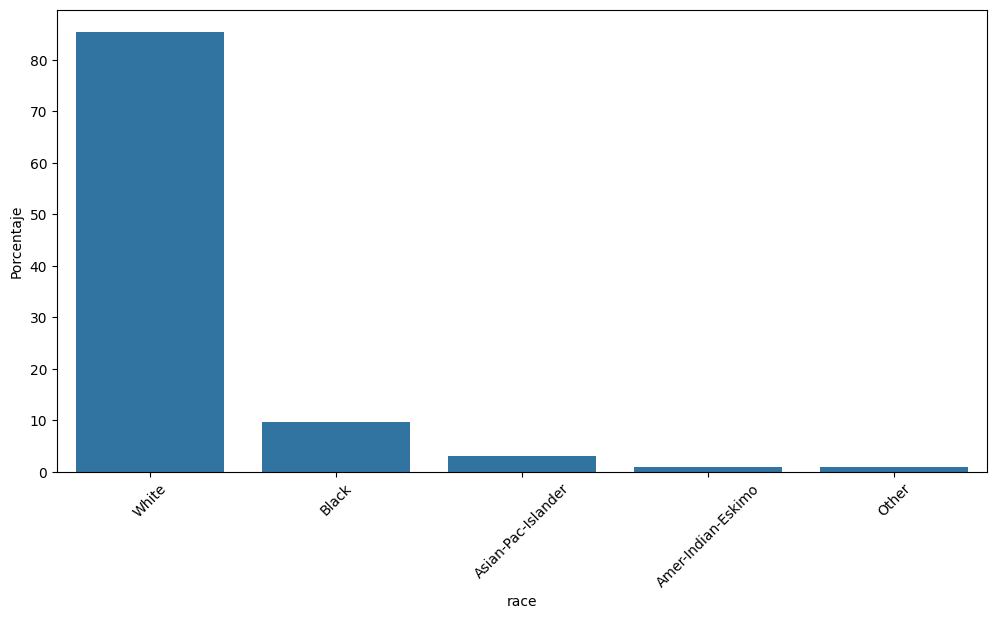

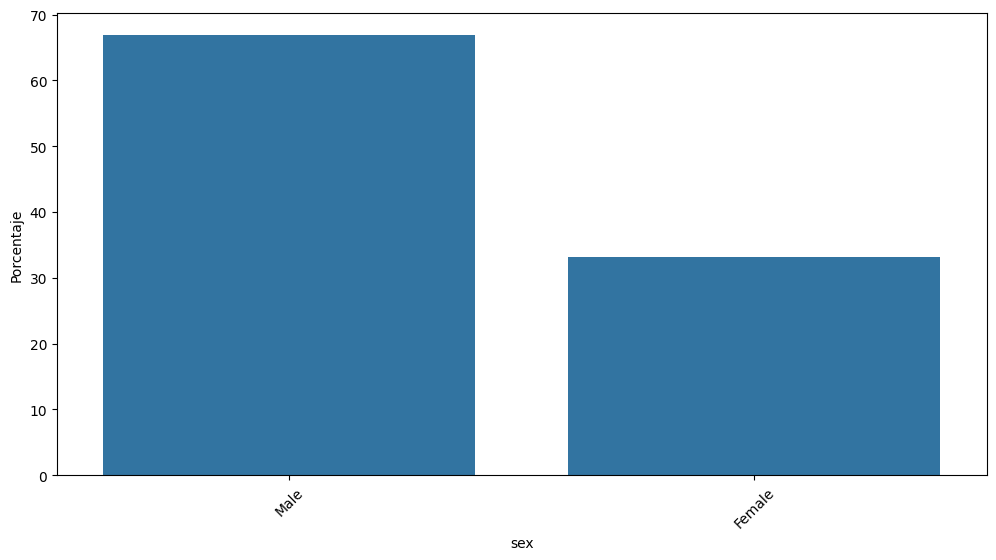

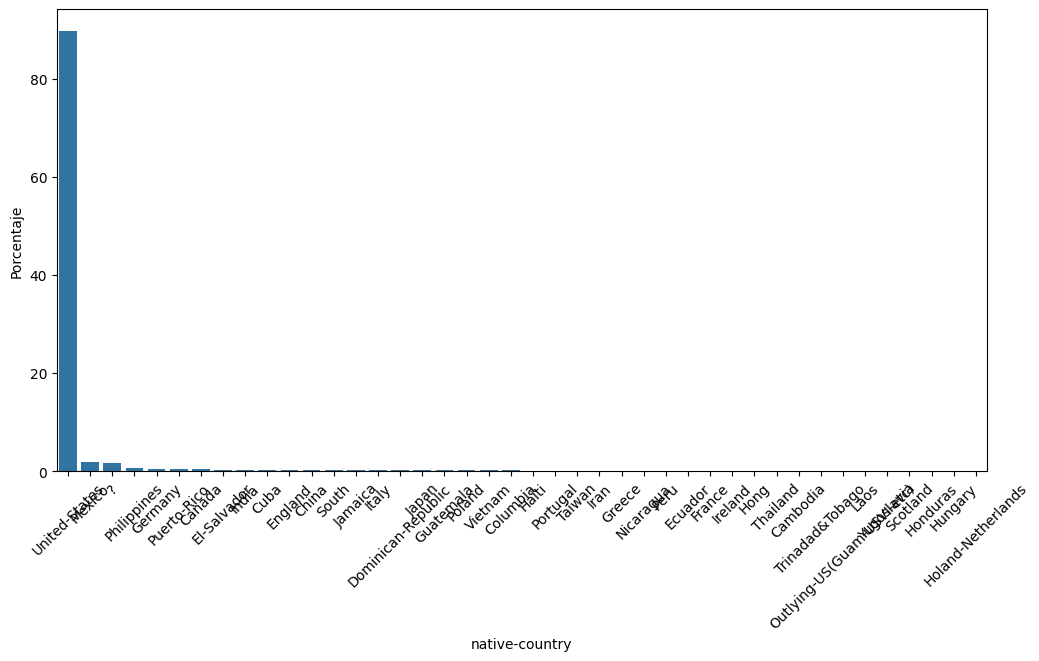

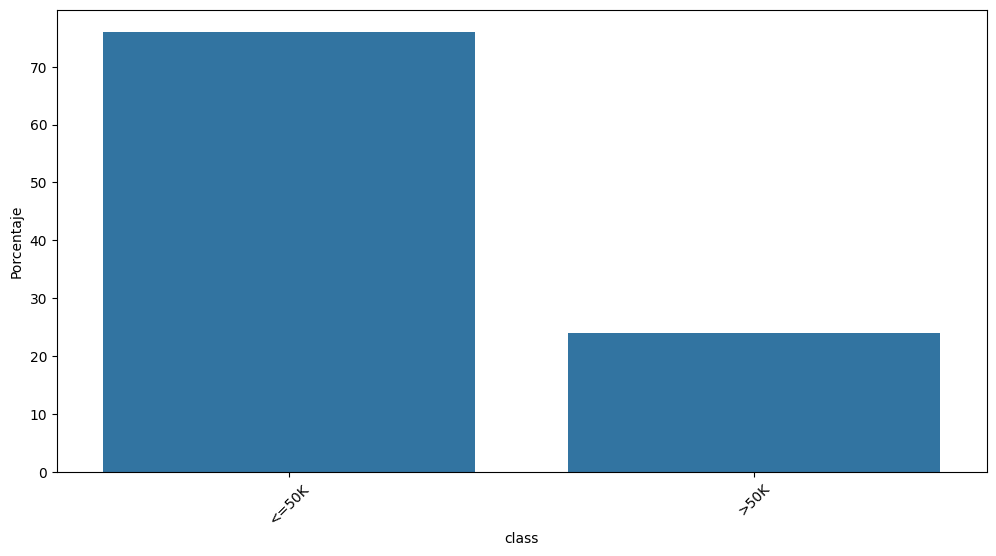

In [6]:
"""
Distribución/porcentajes de cada variable categórica
"""
num_observaciones = datos.shape[0]
for var_cat in VARS_CATEGORICAS:
  porcentajes_var_cat = (datos
    .groupby([var_cat]).size()
    .reset_index(name = 'cantidad')
    .sort_values(by = 'cantidad', ascending = False)
    .assign(Porcentaje = lambda d: 100 * (d['cantidad'] / num_observaciones))
  )

  plt.figure(figsize = (12, 6))
  sns.barplot(
    x = var_cat, y = 'Porcentaje',
    data = porcentajes_var_cat,
    order = porcentajes_var_cat[var_cat]
  )
  plt.xticks(rotation = 45)
  plt.show()

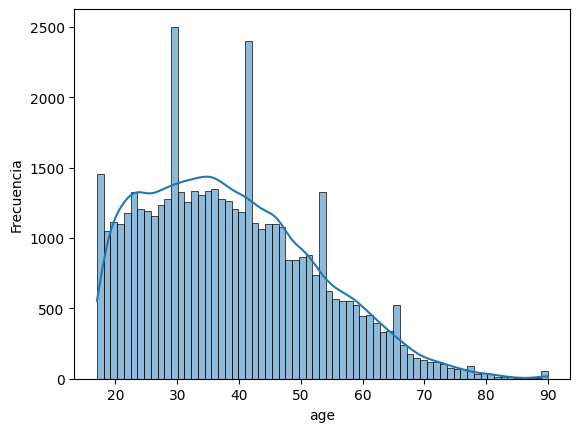

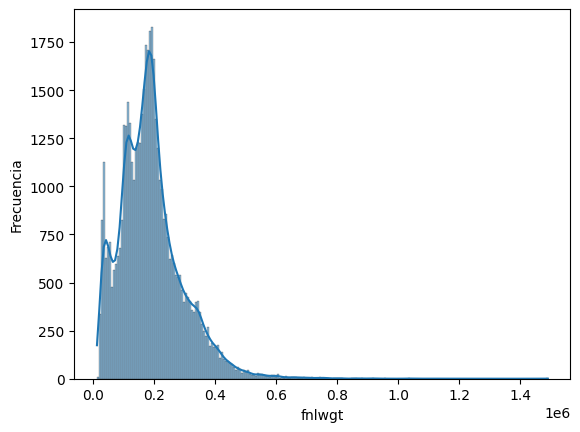

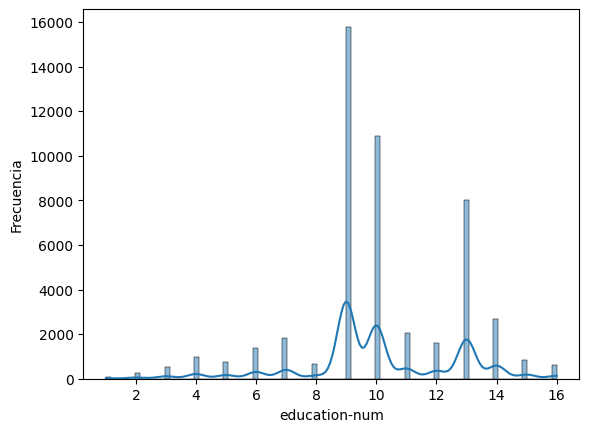

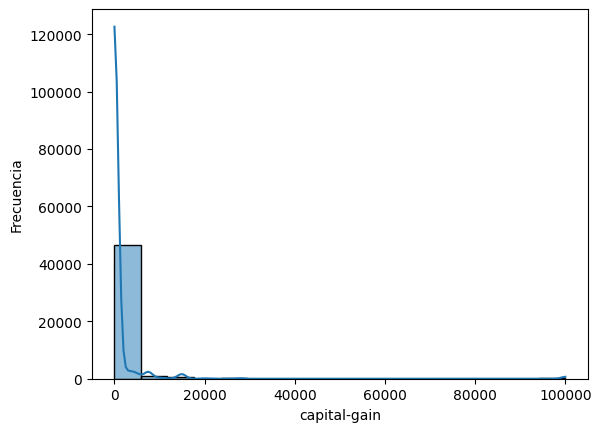

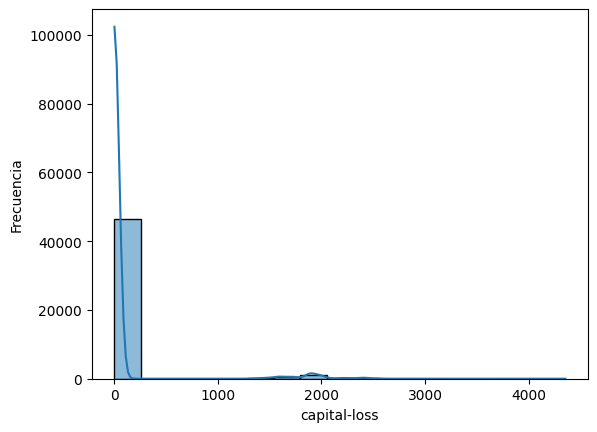

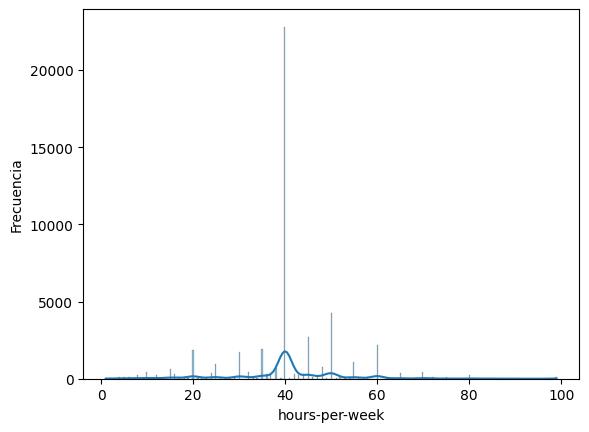

In [7]:
"""
Histograma y densidad aproximada de cada variable numérica
"""
for var_num in VARS_NUMERICAS:
  sns.histplot(
    datos[var_num], 
    # También estimar la densidad de la variable numérica
    kde = True
  )
  plt.ylabel('Frecuencia')
  plt.show()

In [10]:
"""
Comparamos la homogeneidad de las variables numéricas
"""
(datos[VARS_NUMERICAS]
  .describe().T
  # Calcular el coeficiente de variación (C.V) de cada variable numérica
  .assign(coef_variacion = lambda d: d['std'] / d['mean'])
  # Ordenar las variables numéricas de menor a mayor C.V,
  # es decir, de mayor homogeneidad a menor .
  .sort_values('coef_variacion', ascending = True)
  .loc[:, [
    'coef_variacion', 'mean', 'std',
    'min', '25%', '50%', '75%', 'max'
  ]]
)

,coef_variacion,mean,std,min,25%,50%,75%,max
education-num,0.255105,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
hours-per-week,0.306549,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0
age,0.354794,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,0.556795,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
capital-loss,4.605645,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
capital-gain,6.905980,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0


In [9]:
"""
En la tabla resultante, solo la variable numérica "education-num"
posee C.V menor o igual que 30%. 
Así, solo aquella variable numérica es homogénea, es decir,
su promedio es representativo de dicha variable.

Por otro lado, el resto de variables numéricas poseen un C.V mayor
que 30%, así que el promedio de cada una no la representa adecuadamente,
por lo que consistirían de variables heterogéneas (no homogéneas).
"""

'\nEn la tabla resultante, solo la variable numérica "education-num"\nposee C.V menor o igual que 30%. \nAsí, solo aquella variable numérica es homogénea, es decir,\nsu promedio es representativo de dicha variable.\n\nPor otro lado, el resto de variables numéricas poseen un C.V mayor\nque 30%, así que el promedio de cada una no la representa adecuadamente,\npor lo que consistirían de variables heterogéneas (no homogéneas).\n'